<center><img src="https://github.com/girishksahu/INSAID2021/blob/SMART_AI_Learning/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

<h1><center>Machine Learning Advanced Project - Concrete Compressive Strength Prediction for Plastion</center><h1>

<center><img width=40% src="https://github.com/girishksahu/INSAID2021-ML-Advanced-Concrete_Compressive_Strength_Prediction/blob/SMART_AI_Learning/plastion-logo.jpg?raw=true"></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>
  - **3.1** [**Version Check**](#Section31)
  - **3.2** [**Importing Libraries**](#Section32)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Data Pre-profiling**](#Section51)<br>
  - **5.2** [**Data Pre-Processing**](#Section52)<br>
  - **5.3** [**Data Post-profiling**](#Section53)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-Processing**](#Section7)<br>
  - **7.1** [**Feature Selection**](#Section71)<br> 
  - **7.2** [**Data Preparation**](#Section72)<br>
  - **7.3** [**Data Scaling**](#Section73)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- Your client for this project is a major Concrete Producer.

    - Their concrete stands out to be one of the best in the business and holds a contract with five of the most well known real estate companies.
    - Recently, they have developed a new kind of concrete which requires less water and is stronger and better than the concrete they used to sell.
    - Their aim is to source quality fruit that’s sustainably grown and handled in the most efficient, shortest supply route possible.
    - They have few competitors who are also developing new kinds of concrete to launch in the market to get more clients.


**<h3>Current Scenario:</h3>**

- The regular price of concrete per cubic yard is around  **\\$100 to $200** but due to market inflation the current price has gone down and the company is at loss.
- The company has developed a new concrete solution which can be a potential game-changer for the company in the market but they are not sure about the concrete compressive strength which is a very important factor for concrete sale.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- **The current process suffers from the following problems:**
  - The company is under a time crunch to test the compressive strength of the concrete to release in the market.
  - Previously they were using manual methods to test the compressive strength of the concrete which is very time-consuming and inefficient.

- The company has hired you as data science consultant. 
    - They want to automate the process of predicting the compressive strength of the concrete, based on the materials used.

<a name = Section21></a>
### **Your Role**

- You are given a dataset containing materials used in the concrete.
- Your task is to build a regression model using the dataset.
- Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

<a name = Section21></a>
### **Project Deliverables**
- Deliverable: Predict the compressive strength of concrete.
- Machine Learning Task: Regression
- Target Variable: csMPa
- Win Condition: N/A (best possible model)

<a name = Section21></a>
### **Evaluation Metric**

- The model evaluation will be based on the RMSE score.

<center><img src="https://github.com/girishksahu/INSAID2021-ML-Advanced-Concrete_Compressive_Strength_Prediction/blob/SMART_AI_Learning/compressive-strength-test-of-concrete.jpg?raw=true"></center>

### What is the compression strength of concrete?
Usually, the compressive strength of concrete varies from 2500 psi (17 MPa) to 4000 psi (28 MPa) and higher in residential and commercial structures. Several applications also utilize strengths greater than 10,000 psi (70 MPa).

---
<a name = Section3></a>
# **3. Importing Libraries**
---

<a name = Section31></a>
### **3.1 Version Check**

In [4]:
from platform import python_version

# Printing version of Python to ensure correct version is used for this project
print("python version", python_version())
#!pip list
#!pip show


python version 3.8.5


<a name = Section32></a>
### **3.2 Importing Libraries**

In [5]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
import sklearn.metrics
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # Importing to scale the features
from sklearn.model_selection import train_test_split                # Importing to split the data into train and test data
from sklearn.neighbors import KNeighborsRegressor                  # To instantiate a KNN Classifier
from sklearn.ensemble import RandomForestClassifier                 # To instantiate a Random Forest Classifier
from sklearn.metrics import accuracy_score                          # To calculate the accuracy of classifiers
from sklearn.model_selection import KFold                           # To create k folds for cross validation
from sklearn.model_selection import cross_validate                  # To calculate cross validation scores
from sklearn.model_selection import GridSearchCV                    # To tune the models   
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

#Printing version of few key libraries to ensure correct once are used
print ("pandas version", pd.__version__)
print ("numpy version", np.__version__)
print ("seaborn version", sns.__version__)
print ("sklearn version", sklearn.__version__)

pandas version 1.1.3
numpy version 1.19.2
seaborn version 0.11.0
sklearn version 0.24.2


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The **Training dataset** contains materials used in making the concrete.The column **csMPa** is the compressive strength of concrete.This is the data that we have to predict the compressive strength.


| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 824 | 10 | 64.4 KB | 

<br>

| ID | Feature Name | Description of the feature |
| :-- | :--| :--| 
|01| **Id**   | Unique identity of each observation                          |
|02| **cement** | Quantity of cement in the mixture in kg(kilogram)                |
|03| **slag**        | Quantity of slag in the mixture in kg(kilogram)            |
|04| **Flyash**          | Quantity of fly ash in the mixture in kg(kilogram)                     |
|05| **water**      | Quantity of water in the mixture in kg(kilogram)                  |
|06| **superplasticizer**           | Quantity of superplasticizer in the mixture in kg(kilogram)
|07| **coarseaggregate**     | Quantity of coarse aggregate in the mixture in kg(kilogram) |
|08| **fineaggregate**     | Quantity of fine aggregate in the mixture in kg(kilogram)|
|09| **age**        | Age of the mixture in days|
|10| **csMPa**          | compressive strength of concrete in MPa(dependent variable) |

- The **Test dataset** consists of materials used in making the concrete and **csMPa** need to be predicted.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 206 | 9 | 24.5 KB | 

<br>

- Load Concrete data to be used for Training and Validation

In [6]:
# Id is unique ID for record and can be used as label for index
concrete_master_data = pd.read_csv("https://raw.githubusercontent.com/girishksahu/INSAID2021-ML-Advanced-Concrete_Compressive_Strength_Prediction/SMART_AI_Learning/concrete_train.csv", index_col='Id')

# Get the dimesions of data
print('Shape of the Training and Validation dataset:', concrete_master_data.shape)

# Output first 5 data rows
concrete_master_data.head()


Shape of the Training and Validation dataset: (824, 9)


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
Id,,,,,,,,,
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28,27.68
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28,62.05
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3,23.80
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28,33.40
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3,7.40


- Load Concrete Test Data to be used for Compressive Strength Prediction

In [7]:
# Id is unique ID for record and can be used as label for index
concrete_test_data = pd.read_csv("https://raw.githubusercontent.com/girishksahu/INSAID2021-ML-Advanced-Concrete_Compressive_Strength_Prediction/SMART_AI_Learning/concrete_test.csv", index_col='Id')

# Get the dimesions of data
print('Shape of the Test dataset to be used for Prediction:', concrete_test_data.shape)

# Output first 5 data rows
concrete_test_data.head()

Shape of the Test dataset to be used for Prediction: (206, 8)


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
Id,,,,,,,,
31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7
136,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3
918,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28


In [8]:
# Check for any missing values
any(concrete_master_data.isna().sum())

False

In [9]:
#check if any duplicate row
any(concrete_master_data.duplicated())

True

<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [10]:
print('Describe Feature Length:', len(concrete_master_data.describe(include='all').columns))
concrete_master_data.describe(include=[np.int64]).filter(items=['count'], axis=0)

Describe Feature Length: 9


,age
count,824.0


In [11]:
#Basic statistical details for numeric variables

concrete_master_data.describe(include=[np.float64])

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,csMPa
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,283.360801,74.371602,53.160801,181.797087,6.163956,973.548544,772.107403,35.857864
std,107.536404,86.977784,64.000646,21.321905,5.967258,78.694630,80.984717,16.865099
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,2.330000
25%,192.000000,0.000000,0.000000,164.900000,0.000000,932.000000,726.775000,23.685000
50%,275.100000,22.000000,0.000000,185.350000,6.100000,968.000000,778.500000,34.080000
75%,359.900000,144.775000,118.300000,192.000000,10.125000,1040.600000,821.250000,45.862500
max,540.000000,359.400000,195.000000,247.000000,32.200000,1145.000000,992.600000,82.600000


**Observations:**
- Total count for all numeric variables is same (824) which confirms that there are no missing values.
- Most of them appears to mean value similar to median
- Variables like **slag** and **flyash** appears to be highly skewed.
- **csMPa** appears to have somewhat normal distribution.

In [12]:
# Columns list can be handy and useful for further steps
concrete_master_data.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of the features**.

In [13]:
# Check column data types and any null values
concrete_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824 entries, 995 to 860
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            824 non-null    float64
 1   slag              824 non-null    float64
 2   flyash            824 non-null    float64
 3   water             824 non-null    float64
 4   superplasticizer  824 non-null    float64
 5   coarseaggregate   824 non-null    float64
 6   fineaggregate     824 non-null    float64
 7   age               824 non-null    int64  
 8   csMPa             824 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 64.4 KB


**Observations:**

- Total Non-Null count for each column is same as 824 which means there are no missing values.

- There are **10 Numerical features** with **Id** column used as index and **age** column as integer feature as they contain numerical values.

In [14]:
# Get list of numerical variables
s = (concrete_master_data.dtypes == 'int64')
numeric_cols = list(s[s].index)

print("Numeric variables INT:")
print(numeric_cols)

Numeric variables INT:
['age']


In [15]:
# Get list of numerical variables
s = (concrete_master_data.dtypes == 'float64')
numeric_cols = list(s[s].index)

print("Numeric variables Float:")
print(numeric_cols)

Numeric variables Float:
['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'csMPa']


<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [16]:
profile = ProfileReport(df=concrete_master_data)
profile.to_file(output_file='Concrete Compressive Strength Prediction Pre Profiling Report.html')
print('Accomplished!')


Accomplished!


**Observations:**

- The report shows that there are a **total** of **10 features** out of which all are **numerical** type.
- All the feature contains number of observations as 824.

- **slag** feature has 45.8% as zero values and appear to be positvely skewed.
- **flyash** feature has 55.9% as zero values and appear to be positvely skewed.
- **sperplasticizer** feature has 36.9% as zero values and appear to be positvely skewed.

- For detailed information, please check **Concrete Compressive Strength Prediction Pre Profiling Report.html** file.

<a name = Section52></a>
### **5.2 Data Pre-Processing**

- There are no missing values but we will handle few features after EDA and before Model Evaluation

<a name = Section53></a>
### **5.3 Data Post-Profiling**

- We can run the report to get latest information

In [17]:
# post_profile=ProfileReport(df=concrete_master_data)
# post_profile.to_file(output_file='Concrete-Compressive-Strength Post Profiling Report.html')
# print('Accomplished!')

**Observations:**

- TBD

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

**NOTE**:  

- Exploratory Data Analysis will explore all the features and their relationship with other features
- Both non-graphical and graphical method will be used as applicable to respective features
- Both univariate and bivariate method be used as applicable to respective features

**Q: What is the distribution of csMPa?**

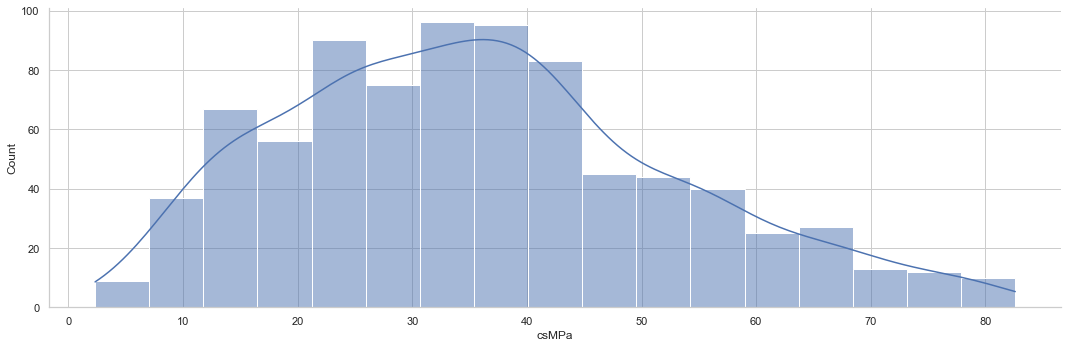

In [18]:
sns.set_theme()
sns.set_style("whitegrid")
# Create a countplot for csMPa feature
sns.displot(data=concrete_master_data, x='csMPa', kde=True, height=5, aspect=3)
plt.show()

**Q: What is the distribution of age?**

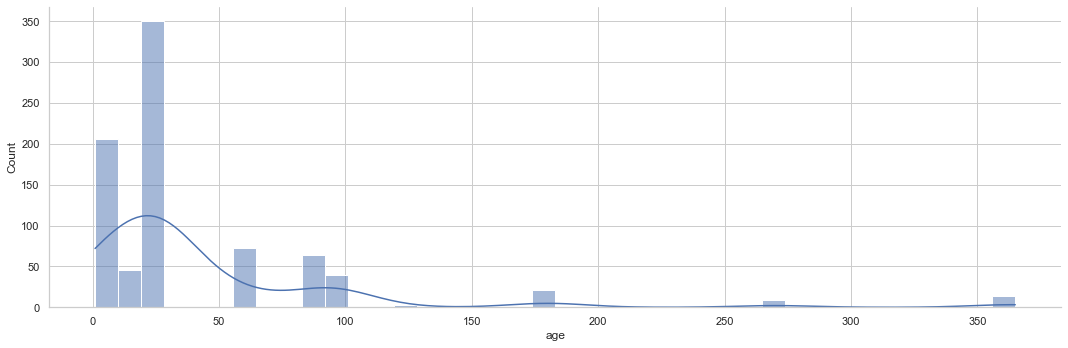

In [19]:
sns.displot(data=concrete_master_data, x='age', kde=True, height=5, aspect=3)
plt.show()

**Q: What is the distribution of water?**

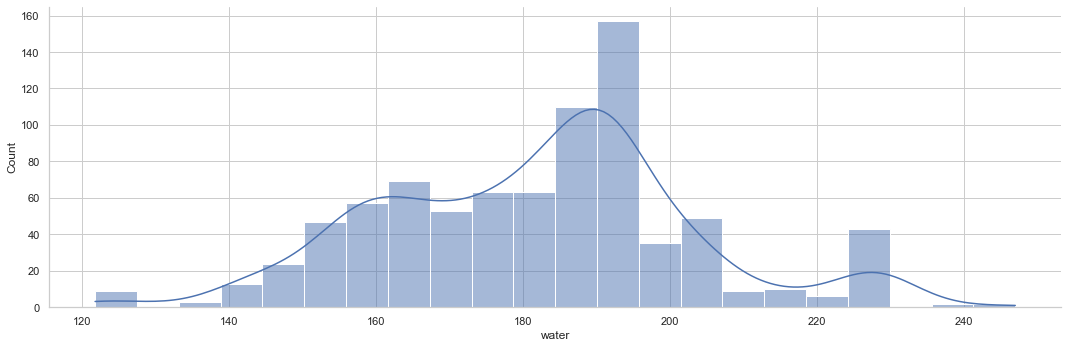

In [20]:
sns.displot(data=concrete_master_data, x='water', kde=True, height=5, aspect=3)
plt.show()

**Q: What is the relationship of age and cement?**

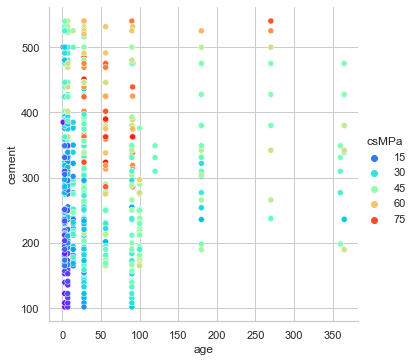

In [21]:
sns.relplot(data=concrete_master_data, x="age", y='cement',hue="csMPa", palette='rainbow')

**Q: What is the relationship of water and cement?**

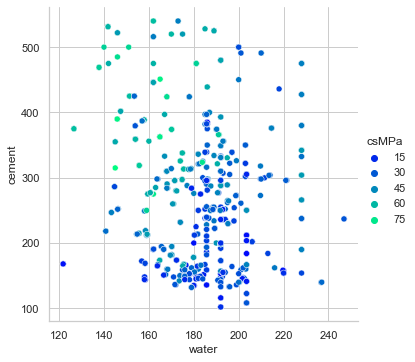

In [22]:
sns.relplot(data=concrete_master_data, x="water", y='cement',hue="csMPa", palette='winter')

**Q: What is the relationship of water and age?**

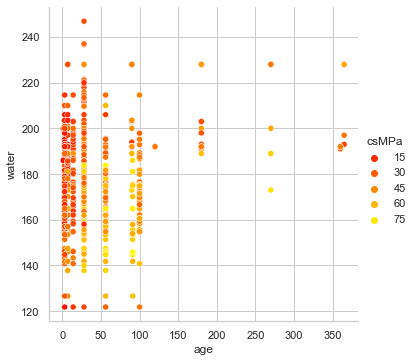

In [23]:
sns.relplot(data=concrete_master_data, x="age", y='water',hue="csMPa", palette='autumn')

**pair plots for Numeric feature distribution to get different view point for better data understanding**

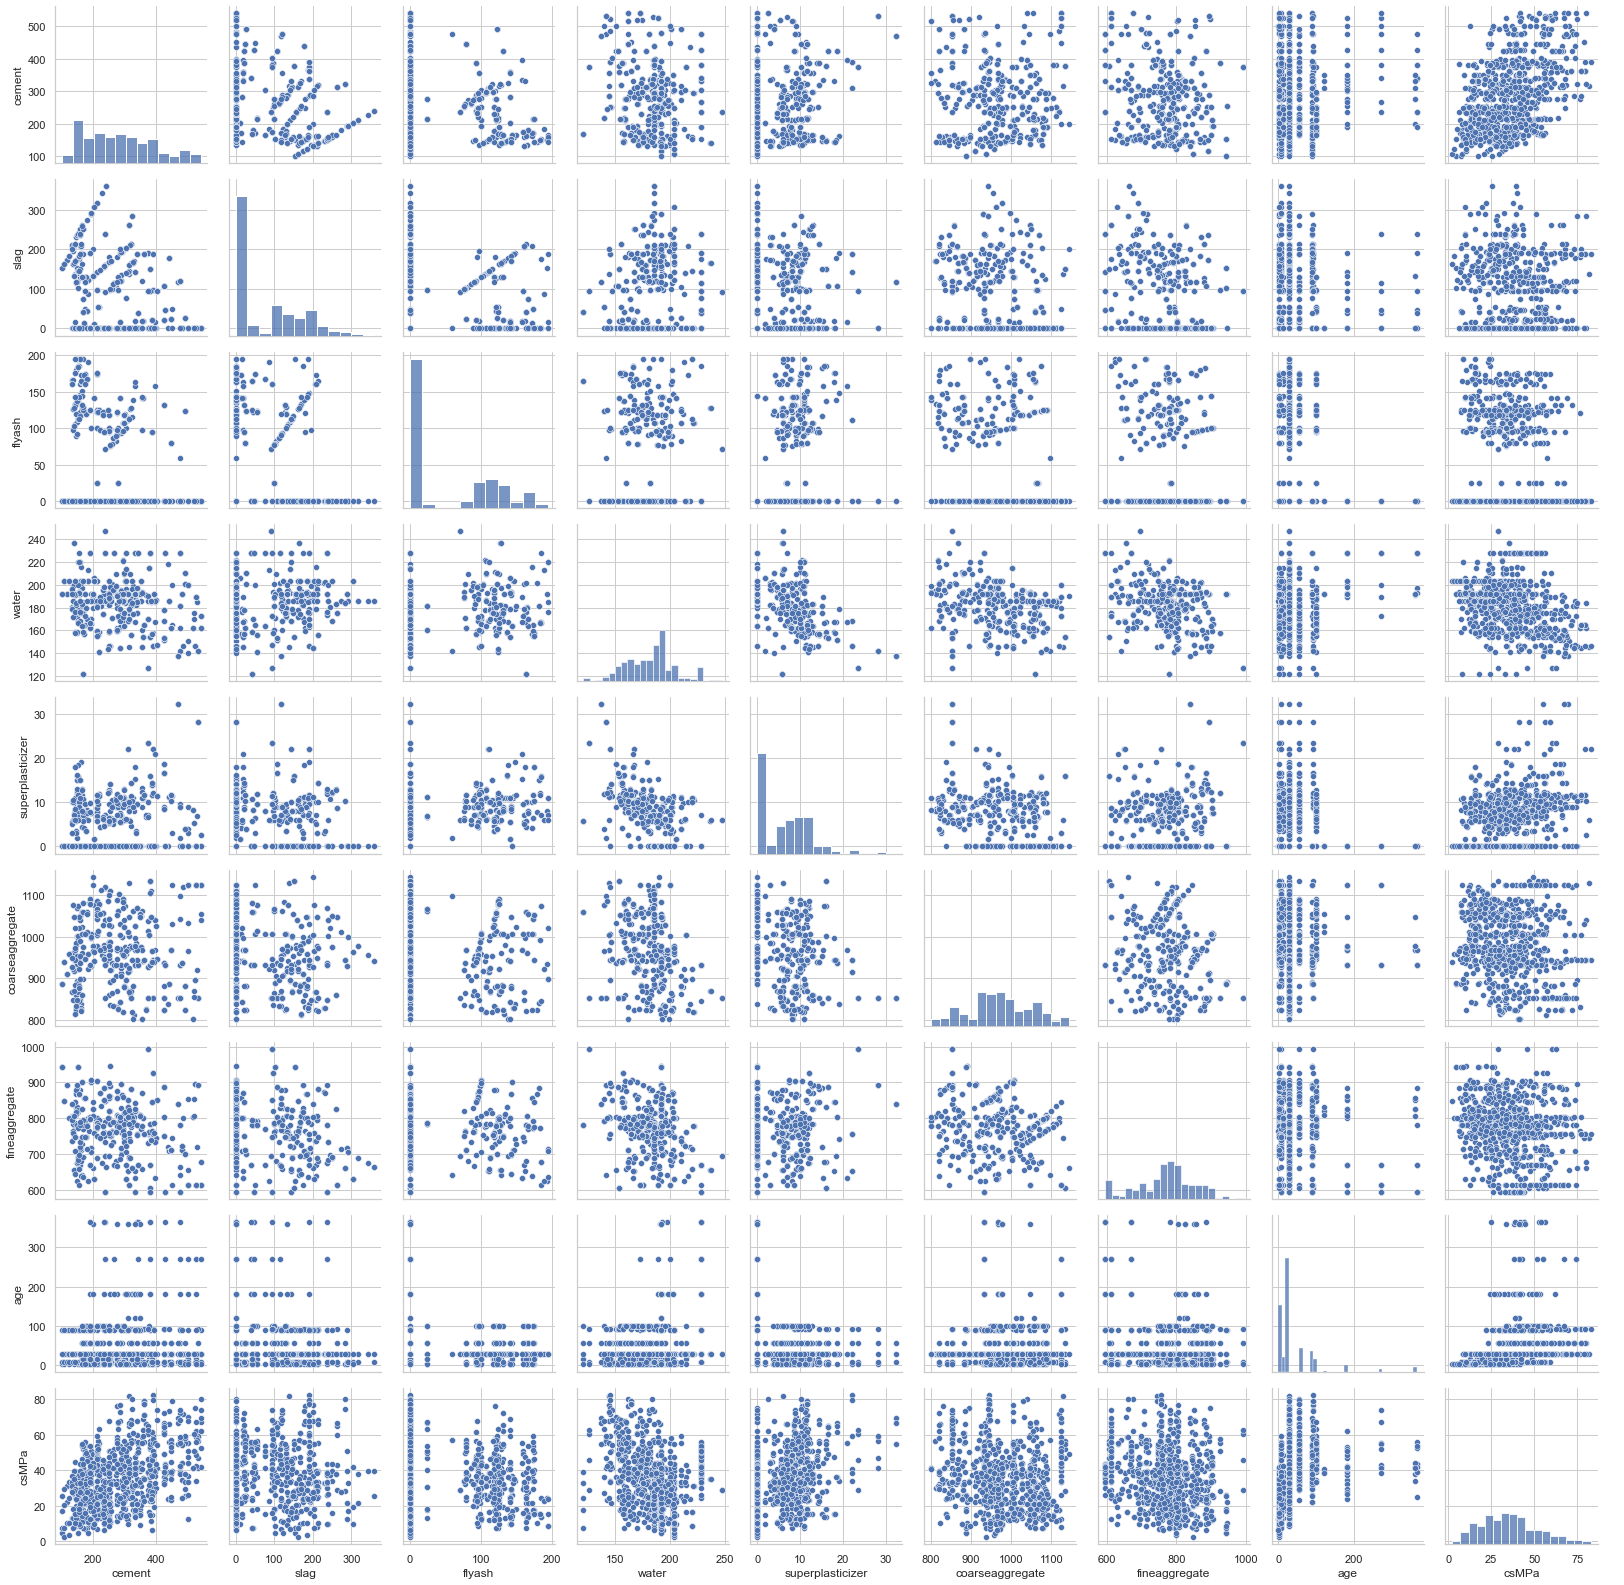

In [24]:
g = sns.PairGrid(concrete_master_data)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

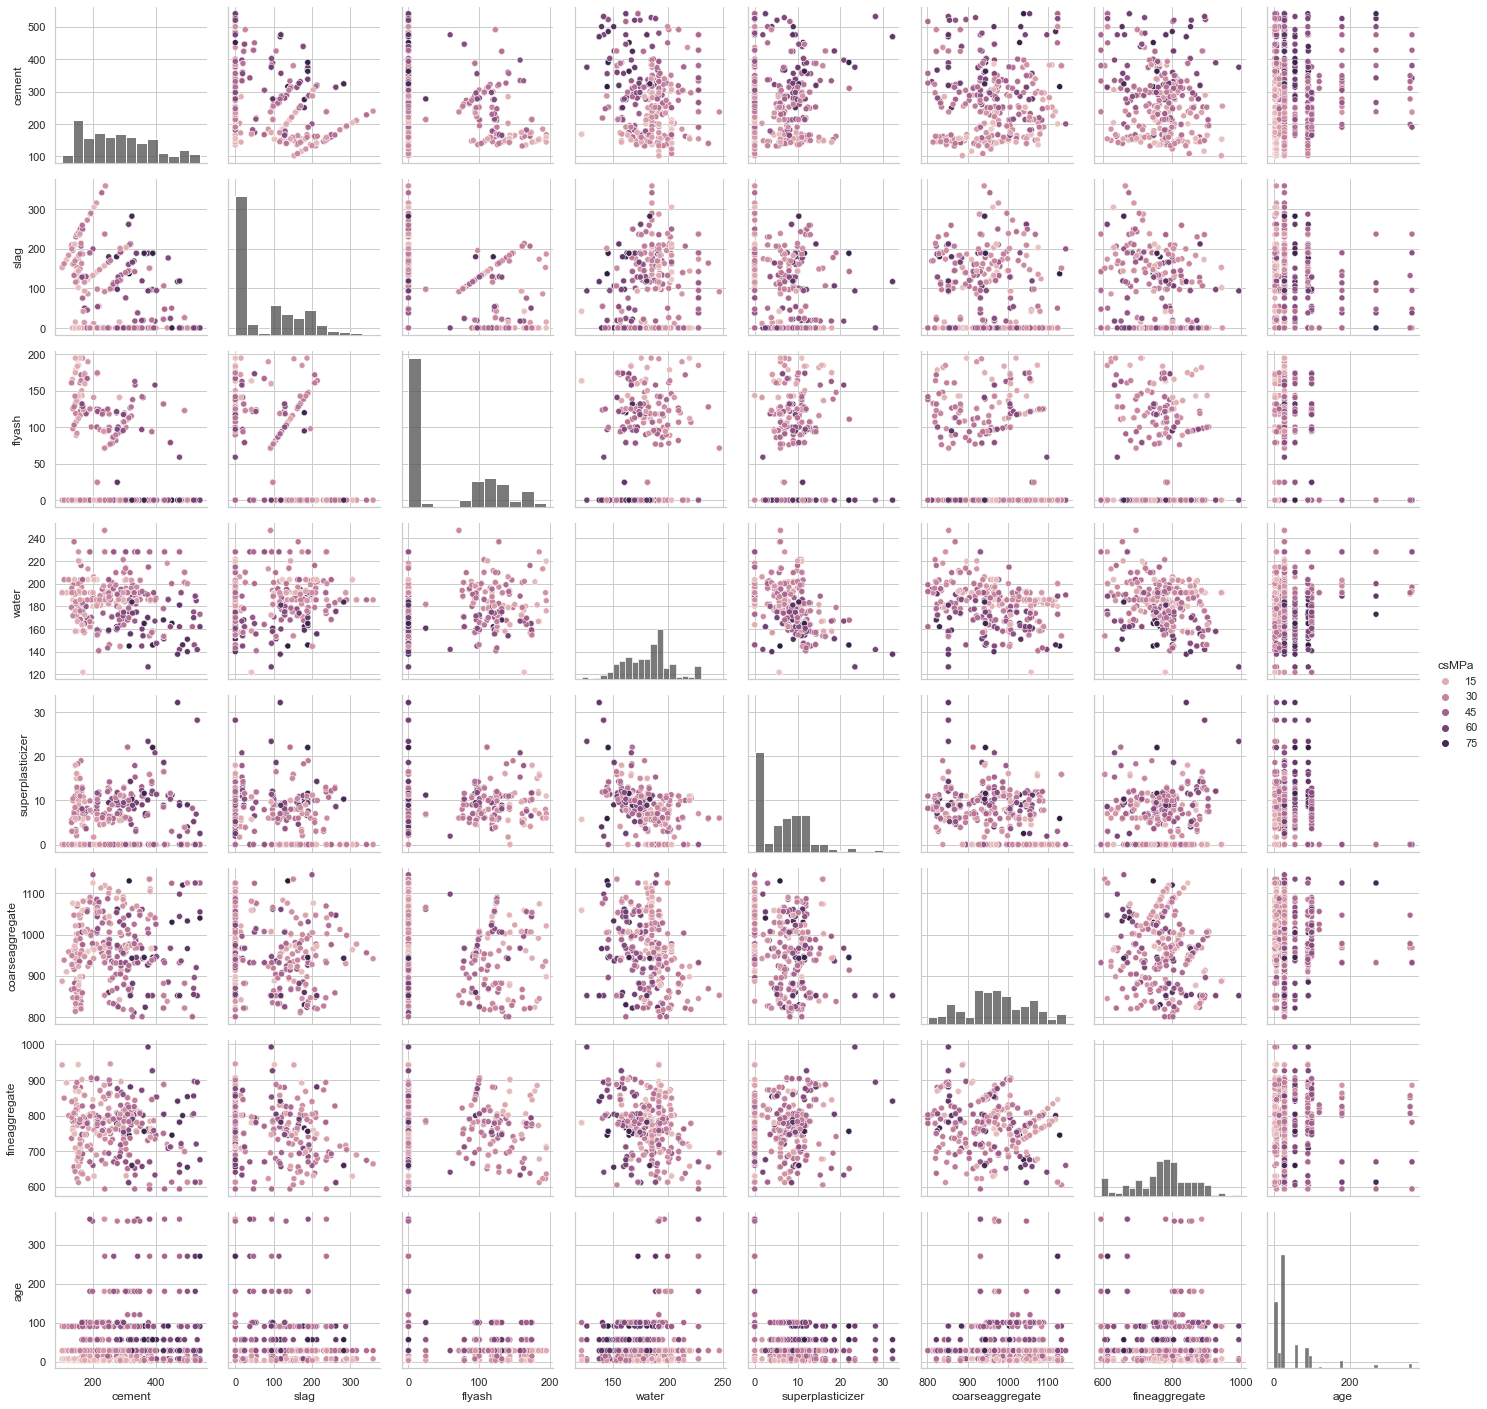

In [25]:
g = sns.PairGrid(concrete_master_data, hue='csMPa')
g.map_diag(sns.histplot,hue=None, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()

**Q: What is correlation of csMPa across various Numerical features**

Text(0.5, 1.0, 'Correlation between Numerical features and target variable')

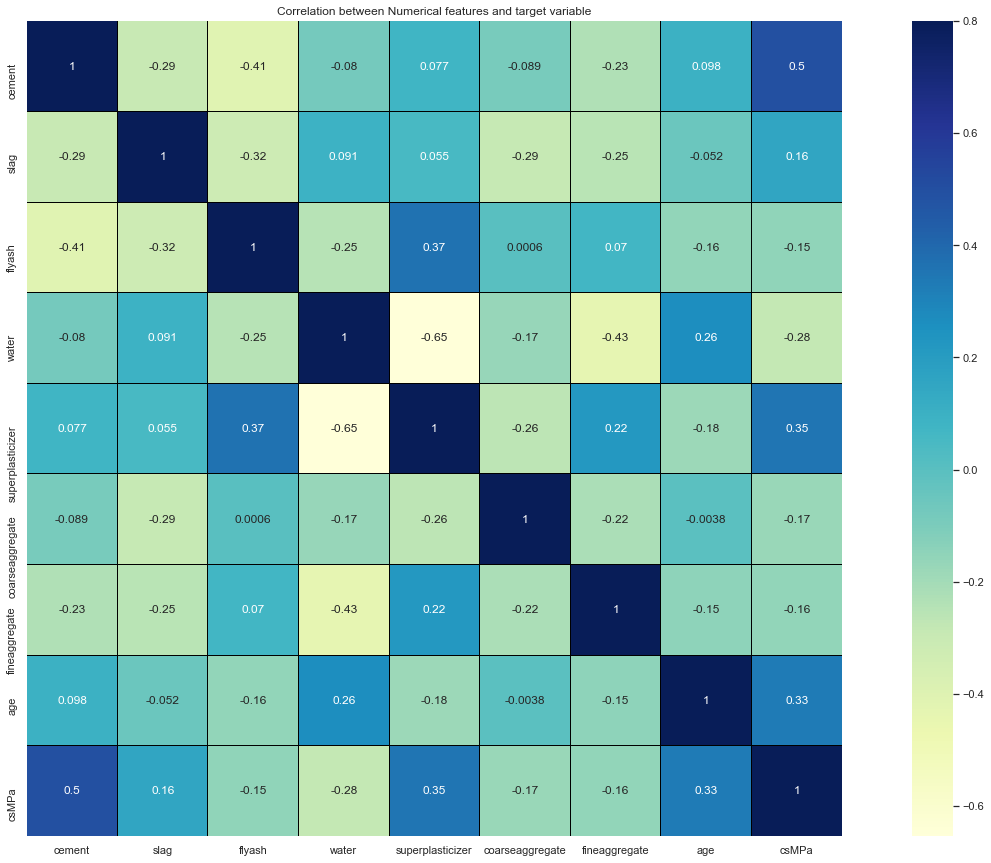

In [26]:
#Check correlation primarily between Numerical linear features and target variable
#Correlation is a measure used to represent how strongly two random variables are related to each other.
#Correlation ranges between -1 and +1
corr = concrete_master_data.corr(method='pearson')
plt.figure(figsize=(25,15))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between Numerical features and target variable')

**Observations:**

- There is very little positive correlation for **csMPa** with **cement**, **superplasticizer** and **age**
- There is very little negative correlation for **csMPa** with **water**
- There is very little positive correlation for **water** with **age** and **superplasticizer** with **flyash**
- There is slight negative correlation for **water** with **superplasticizer**
- There is very little negative correlation for **cement** with **flyash** and **water** with **fineaggregate**

In [27]:
#Covariance is a measure to indicate the extent to which two random variables change in tandem.
#Covariance can vary between -∞ and +∞
concrete_master_data.cov()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,11564.078158,-2735.312330,-2809.920846,-182.455461,49.502887,-753.741023,-1993.153561,634.717939,900.796218
slag,-2735.312330,7565.134988,-1758.019644,169.663404,28.773823,-1969.436821,-1774.325610,-271.480101,227.601385
flyash,-2809.920846,-1758.019644,4096.082726,-336.584853,139.702231,3.025004,362.535807,-606.974771,-161.635610
water,-182.455461,169.663404,-336.584853,454.623612,-83.183179,-284.864172,-750.382785,335.951990,-102.337587
superplasticizer,49.502887,28.773823,139.702231,-83.183179,35.608165,-123.515733,105.192624,-65.058391,35.554788
coarseaggregate,-753.741023,-1969.436821,3.025004,-284.864172,-123.515733,6192.844810,-1380.560639,-18.194479,-227.762259
fineaggregate,-1993.153561,-1774.325610,362.535807,-750.382785,105.192624,-1380.560639,6558.524332,-721.254477,-216.378645
age,634.717939,-271.480101,-606.974771,335.951990,-65.058391,-18.194479,-721.254477,3657.310489,338.691828
csMPa,900.796218,227.601385,-161.635610,-102.337587,35.554788,-227.762259,-216.378645,338.691828,284.431576


<a name = Section7></a>

---
# **7. Data Post-Processing**
---



<a name = Section71></a>
### **7.1 Feature Selection**

- Not Required for this dataset but will try to see which Feature are important

In [28]:
y= concrete_master_data['csMPa']

In [29]:
concrete_master_data.drop(columns='csMPa', inplace=True)

In [30]:
concrete_master_data.shape

(824, 8)

In [31]:
# # Saving all feature names to a list in a variable
# import sklearn.preprocessing
# dataColumns = concrete_master_data.columns.to_list()

# encoder = StandardScaler()

# for i in dataColumns:
#    concrete_master_data[i] = encoder.fit_transform(concrete_master_data[[i]])

# print('Success!')

In [32]:
# test_dataColumns = concrete_test_data.columns.to_list()

# #encoder = StandardScaler()

# for i in test_dataColumns:
#    concrete_test_data[i] = encoder.transform(concrete_test_data[[i]])

# print('Success!')

In [33]:
# from sklearn.feature_selection import SelectFromModel               # To select features from model using Yellow bricks
# from yellowbrick.model_selection import FeatureImportances 
# from sklearn.ensemble import RandomForestRegressor 

# # Have some patience, may take some time :)
# selector = SelectFromModel(RandomForestRegressor(n_estimators = 200, random_state = 42, n_jobs = -1))
# selector.fit(concrete_master_data, y)

# # Extracting list of important features
# selected_feat = concrete_master_data.columns[(selector.get_support())].tolist()

# print('Total Features Selected are', len(selected_feat))

# # Estimated by taking mean(default) of feature importance
# print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
# print('Features:', selected_feat)

In [34]:
# figure = plt.figure(figsize = [20, 12])

# # If you don't want relative importance, use relative = False in below method
# viz = FeatureImportances(selector.estimator, relative = False)
# viz.fit(concrete_master_data, y)

# plt.xlabel('Relative Importance', size = 14)
# plt.ylabel('Features', size = 14)
# plt.title(label = 'Feature Importances', size = 16)
# plt.show()

<a name = Section72></a>
### **7.2 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development using holdout validation technique.

In [35]:
# Splitting data into training and testing sets with using Validation Test Data as 25%
X_train, X_test, y_train, y_test = train_test_split(concrete_master_data, y, test_size=0.25, random_state=42)

# Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
X_train.info()
#X_train.columns
X_train.head()

X_train shape:  (618, 8)
y_train shape:  (618,)
X_test shape:  (206, 8)
y_test shape:  (206,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 618 entries, 216 to 357
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            618 non-null    float64
 1   slag              618 non-null    float64
 2   flyash            618 non-null    float64
 3   water             618 non-null    float64
 4   superplasticizer  618 non-null    float64
 5   coarseaggregate   618 non-null    float64
 6   fineaggregate     618 non-null    float64
 7   age               618 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 43.5 KB


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
Id,,,,,,,,
216,190.3,0.0,125.2,161.9,9.9,1088.1,802.6,28
181,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91
242,229.7,0.0,118.2,195.2,6.1,1028.1,757.6,56
574,135.7,203.5,0.0,185.7,0.0,1076.2,759.3,7
170,388.6,97.1,0.0,157.9,12.1,852.1,925.7,91


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
pipe = Pipeline(steps=[("scale", StandardScaler()),
                       ("transform", PowerTransformer()),
("knn", KNeighborsRegressor(n_jobs=-1))])

param_grid = {
    'knn__n_neighbors' : [1,2,3,4,5,6,7,8,9,10]
}

search = GridSearchCV(pipe,param_grid,cv=10)
search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('transform', PowerTransformer()),
                                       ('knn',
                                        KNeighborsRegressor(n_jobs=-1))]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [37]:
search.best_params_

{'knn__n_neighbors': 3}

In [38]:
search.best_score_

0.8268549359788755

In [39]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('transform', PowerTransformer()),
  ('knn', KNeighborsRegressor(n_jobs=-1))],
 'verbose': False,
 'scale': StandardScaler(),
 'transform': PowerTransformer(),
 'knn': KNeighborsRegressor(n_jobs=-1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'transform__copy': True,
 'transform__method': 'yeo-johnson',
 'transform__standardize': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': -1,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [40]:
pipe.fit(X_train, y_train)
pred_train = pipe.predict(X_train)
pred_test = pipe.predict(X_test)

In [41]:
RMSE_train = np.sqrt( mean_squared_error(y_train, pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 5.501988115517968
RMSE for test set is 7.113747225775809


In [42]:
from sklearn.metrics import r2_score
r2_score_train = r2_score(y_train, pred_train)
r2_score_test = r2_score(y_test, pred_test)

In [43]:
r2_score_train

0.8907655388793001

In [44]:
r2_score_test

0.834039902268815

- Here we will do prediction on Test Dataset (aka Real World Data) using KNN Regression model.

In [45]:
test_pred = pipe.predict(concrete_test_data)

<a name = Section73></a>
### **7.3 Data Scaling**

- Here we can try various scaling options available to arrive at best option
- Here I have decided to not do scaling as of now after trying with different scaling options

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop a KNN Regression**

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **RMSE Score** score as required by this project.

<a name = Section81></a>
### **8.1 Baseline Model Development & Evaluation**

- Here we will develop pipeline using KNN Regression model using K=3

In [46]:
knn_pipe = Pipeline(steps=[("scale", StandardScaler()),
                       ("transform", PowerTransformer()),
("knn", KNeighborsRegressor(n_neighbors=3,n_jobs=-1))])

knn_pipe.fit(X_train, y_train)
cv_score= cross_val_score(knn_pipe, X_train, y_train, cv=10, scoring='r2')
print(cv_score)
print("Average R2")
print(np.mean(cv_score))

[0.81762563 0.7736274  0.79757443 0.80704545 0.83065539 0.77915973
 0.86082089 0.84905679 0.85850496 0.89447869]
Average R2
0.8268549359788755


In [47]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('transform', PowerTransformer()),
  ('knn', KNeighborsRegressor(n_jobs=-1, n_neighbors=3))],
 'verbose': False,
 'scale': StandardScaler(),
 'transform': PowerTransformer(),
 'knn': KNeighborsRegressor(n_jobs=-1, n_neighbors=3),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'transform__copy': True,
 'transform__method': 'yeo-johnson',
 'transform__standardize': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': -1,
 'knn__n_neighbors': 3,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [48]:
y_pred_train = knn_pipe.predict(X_train)
y_pred_test = knn_pipe.predict(X_test)

In [49]:
MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)

In [50]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 3.3326699029126217
MAE for test set is 4.734724919093851


In [51]:
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

In [52]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 20.580252984537932
MSE for test set is 42.23487529665588


In [53]:
RMSE_train = np.sqrt( mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [54]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 4.536546371915307
RMSE for test set is 6.4988364571403


In [55]:
from sklearn.metrics import r2_score
r2_score_train = r2_score(y_train, y_pred_train)
r2_score_test = r2_score(y_test, y_pred_test)

In [56]:
r2_score_train

0.9257372403778672

In [57]:
r2_score_test

0.8614909853814647

- Here we will do prediction on Test Dataset (aka Real World Data) using KNN Regression model.

In [58]:
y_test_pred = pipe.predict(concrete_test_data)

In [59]:
output = pd.DataFrame({'Id': concrete_test_data.index,'csMPa': test_pred})
output.to_csv('concrete-compressive-strenth-submission1.csv', index=False, header=False)

In [60]:
output = pd.DataFrame({'Id': concrete_test_data.index,'csMPa': y_test_pred})
output.to_csv('concrete-compressive-strenth-submission2.csv', index=False, header=False)

<a name = Section9></a>

---
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- KNN Regression Model was used for prediction considering this is ML Advanced project.
- RMSE Score was used to arrive at model evaluation which is required for this ML Advanced Project.